<a href="https://colab.research.google.com/github/Onehundredpunches/AI_W9_31_03_23/blob/main/AI_W9_31_03_23_afar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from keras.datasets import cifar100

In [58]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [59]:
x=x_test
y=y_test

In [60]:
x_train.shape

(50000, 32, 32, 3)

In [61]:
y_train.shape

(50000, 1)

In [62]:
x_test.shape


(10000, 32, 32, 3)

In [63]:
y_test.shape

(10000, 1)

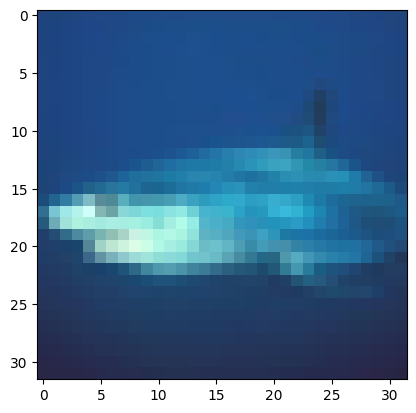

So nay la:  [73]


In [64]:
digit = x_train[49999]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[49999])

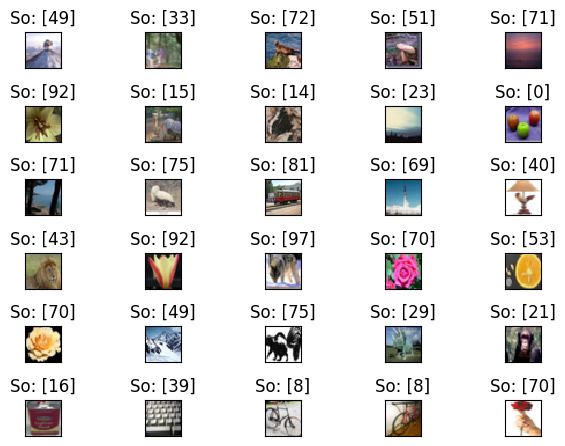

In [65]:
for i in range(30):
  plt.subplot(6,5,i+1)  #ve hinh co 5hang 5cot, i+1: vi tri tuong tac
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) # gan nhan cho so
  plt.xticks([])
  plt.yticks([])

In [66]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1500,activation = 'relu', input_shape = (3072,))) 
model.add(Dense(1000, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(125, activation='relu'))

In [67]:
model.add(Dense(100, activation = 'Softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1500)              4609500   
                                                                 
 dense_25 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_26 (Dense)            (None, 800)               800800    
                                                                 
 dense_27 (Dense)            (None, 400)               320400    
                                                                 
 dense_28 (Dense)            (None, 125)               50125     
                                                                 
 dense_29 (Dense)            (None, 100)               12600     
                                                                 
Total params: 7,294,425
Trainable params: 7,294,425
No

In [68]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [69]:
x_train.shape

(50000, 3072)

In [70]:
x_test.shape

(10000, 3072)

In [71]:
from keras.utils import to_categorical        #chuyen du lieu ve 1 va 0
y_train = to_categorical(y_train, 100)  
y_test = to_categorical(y_test, 100)

In [72]:
y_train.shape

(50000, 100)

In [73]:
y_test.shape

(10000, 100)

In [74]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(x_train, y_train, epochs = 10, batch_size=100)   

Epoch 1/10
500/500 [==============================] - 45s 87ms/step - loss: 4.3501 - accuracy: 0.0379
Epoch 2/10
500/500 [==============================] - 42s 85ms/step - loss: 4.0077 - accuracy: 0.0785
Epoch 3/10
500/500 [==============================] - 43s 87ms/step - loss: 3.8074 - accuracy: 0.1149
Epoch 4/10
500/500 [==============================] - 44s 88ms/step - loss: 3.6558 - accuracy: 0.1401
Epoch 5/10
500/500 [==============================] - 43s 85ms/step - loss: 3.5452 - accuracy: 0.1606
Epoch 6/10
500/500 [==============================] - 44s 88ms/step - loss: 3.4551 - accuracy: 0.1747
Epoch 7/10
500/500 [==============================] - 43s 87ms/step - loss: 3.3736 - accuracy: 0.1908
Epoch 8/10
500/500 [==============================] - 42s 85ms/step - loss: 3.2995 - accuracy: 0.2051
Epoch 9/10
500/500 [==============================] - 43s 86ms/step - loss: 3.2274 - accuracy: 0.2174
Epoch 10/10
500/500 [==============================] - 43s 87ms/step - loss: 3.166

In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 3.3725 - accuracy: 0.2087
Mat mat:  3.3725438117980957
Do chinh xac: 0.2087000012397766


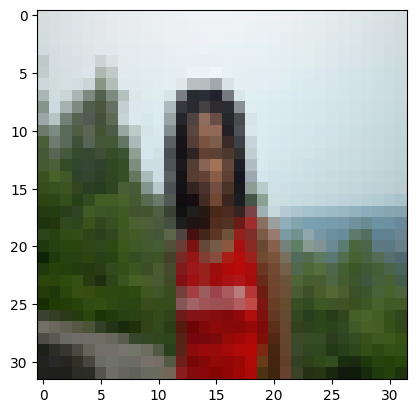

[98]


In [78]:
img = x[4500]
plt.imshow(img)
plt.show()
print(y[4500])

In [80]:
X_pred = x[4500].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 21ms/step


array([17])

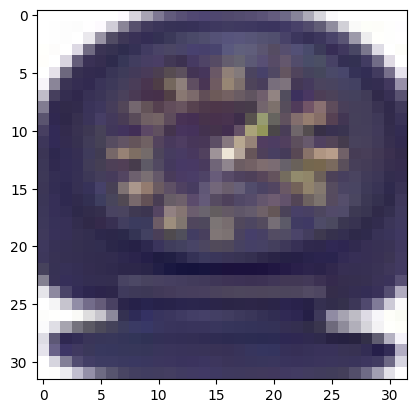

[22]


In [81]:
img = x[90]
plt.imshow(img)
plt.show()
print(y[90])

In [82]:
X_pred = x[90].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 37ms/step


array([22])

In [83]:
# SAVE MODEL WITH NAME: cifar10_model.h5

model.save('cifar100_model.h5')

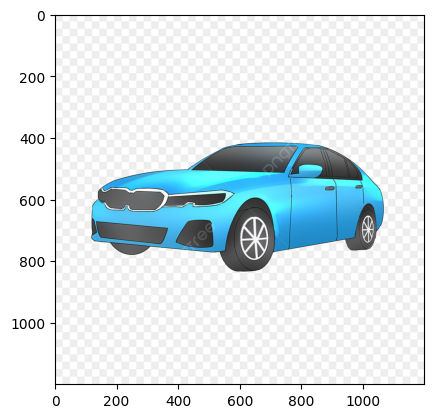

In [84]:
#IMPORT A PICTURE FOR MODEL PREDICT

url = '/content/oto.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

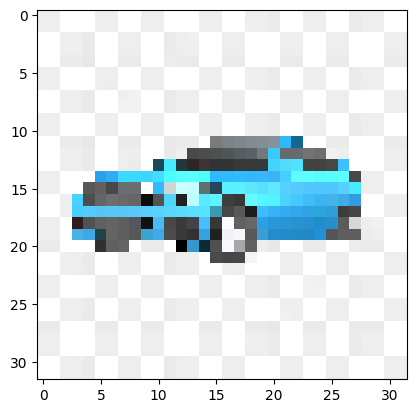

In [85]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [86]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 81ms/step


array([20])

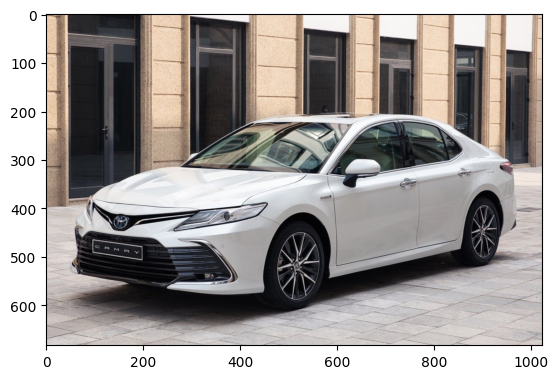

In [87]:
url = '/content/oto toyota.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

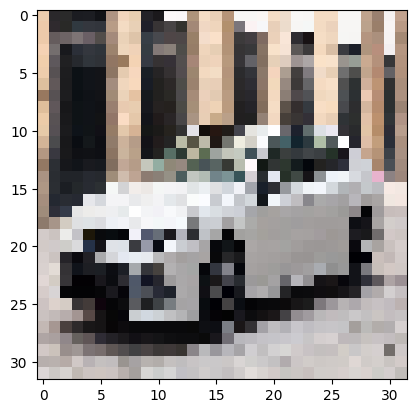

In [88]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [89]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 26ms/step


array([13])